## Background

For the EDA, we analyzed unemployment data from Federal Reserve Economic Data (FRED) using the Quandl API. We cleaned our dataset and the final dataset has 577 rows and 18 columns.

We created a python function to make repeated API calls and the argument passed is a code for each demographic group. We further performed API calls for our demographic groups of interest.

The visualizations includce a Time series plots to showcase the following relationships: Overall unemployment rate, unemployment rate by gender, Race/Ethnic group, age and highest level of aducation.

The script allows us to save both a CSV of all data retrieved and png images for each time series plots.

#### Dependencies and Setup

In [1]:
# Importing dependencies

import pandas as pd
import numpy as np
import requests
import time

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

We chose to analyze unemployment data from the Federal Reserve Economic Data (FRED).
We accessed the information using an API key from Quandl.

In [2]:
# Establishing the API call to retrieve raw data
# We are starting builing our dataframe using the "civilian" unemployment
# rate as a baseline or reference for the later analysis.

API_KEY = 'tT8qNAwBZW89z54wPsZy'
url = 'https://www.quandl.com/api/v3/datasets/FRED/UNRATE.json?api_key='+ API_KEY
req = requests.get(url).json()
req


{'dataset': {'id': 120133,
  'dataset_code': 'UNRATE',
  'database_code': 'FRED',
  'name': 'Civilian Unemployment Rate',
  'description': 'Percent Seasonally Adjusted, The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces. ',
  'refreshed_at': '2021-04-03T01:13:47.840Z',
  'newest_available_date': '2021-03-01',
  'oldest_available_date': '1948-01-01',
  'column_names': ['Date', 'Value'],
  'frequency': 'monthly',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '1948-01-01',
  'end_date': '2021-03-01',
  'data': [['2021-03-01', 6.0],
   ['2021-02-01', 6.2],
   ['2021-01-01', 6.3],
   ['2020-12-0

In [3]:
#Looking at results of the first API call and and creating a pandas dataframe

demographic = req['dataset']['name']
unemp_rate = req['dataset']['data']
#unemp_rate
civilian = pd.DataFrame(unemp_rate,columns=['date' , demographic]) # converting list to df
civilian


,date,Civilian Unemployment Rate
0,2021-03-01,6.0
1,2021-02-01,6.2
2,2021-01-01,6.3
3,2020-12-01,6.7
4,2020-11-01,6.7
...,...,...
874,1948-05-01,3.5
875,1948-04-01,3.9
876,1948-03-01,4.0
877,1948-02-01,3.8


In [4]:
# Each API call results in one series. We are interested in examining a set of 
# series representing demographic groups. Therefore, we created a function to
# make repeated API calls and the argument passed is a code for each demographic
# group. 

def my_func(a= 'dataset_code'):
    
    API_KEY = 'tT8qNAwBZW89z54wPsZy'
    url = 'https://www.quandl.com/api/v3/datasets/FRED/'+a+'.json?api+key='+API_KEY
    req = requests.get(url).json()
    # print(response) to check results
    demographic = req['dataset']['name']
    unemp_rate = req['dataset']['data']
    df = pd.DataFrame(unemp_rate,columns=['date' , demographic])
    return df

# Making the API calls for our demographic groups of interest.

The first set of API calls is for race/ethnic groups.

NOTE: Because the API calls are slow, please execute API call cells one at a time, so that the program does not 
halt.

In [5]:
#TANISHA THIS IS DIFFERENT FROM THE LAST NOTEBOOK:
# civilian = pd.DataFrame(unemp_rate,columns=['date' , demographic]) # converting list to df
civilian = my_func(a = 'UNRATE')
time.sleep(1.01)
civilian

,date,Civilian Unemployment Rate
0,2021-03-01,6.0
1,2021-02-01,6.2
2,2021-01-01,6.3
3,2020-12-01,6.7
4,2020-11-01,6.7
...,...,...
874,1948-05-01,3.5
875,1948-04-01,3.9
876,1948-03-01,4.0
877,1948-02-01,3.8


In [6]:
# We use the time.sleep() method to delay the API calls when we are making several of them. 

white = my_func(a = 'LNS14000003')
time.sleep(1.01)
white

,date,Unemployment Rate: White
0,2021-03-01,5.4
1,2021-02-01,5.6
2,2021-01-01,5.7
3,2020-12-01,6.0
4,2020-11-01,5.9
...,...,...
802,1954-05-01,5.3
803,1954-04-01,5.5
804,1954-03-01,5.0
805,1954-02-01,4.9


In [7]:
hispanic = my_func(a = 'LNS14000009')
time.sleep(1.01)
hispanic

,date,Unemployment Rate: Hispanic or Latino
0,2021-03-01,7.9
1,2021-02-01,8.5
2,2021-01-01,8.6
3,2020-12-01,9.3
4,2020-11-01,8.4
...,...,...
572,1973-07-01,7.2
573,1973-06-01,7.9
574,1973-05-01,8.1
575,1973-04-01,7.9


In [8]:
asian = my_func(a= 'LNU04032183')
time.sleep(1.01)
asian

,date,Unemployment Rate: Asian
0,2021-03-01,5.9
1,2021-02-01,5.1
2,2021-01-01,6.8
3,2020-12-01,5.8
4,2020-11-01,6.7
...,...,...
250,2000-05-01,3.5
251,2000-04-01,3.1
252,2000-03-01,4.1
253,2000-02-01,3.4


In [9]:
african = my_func(a='LNS14000006')
time.sleep(1.01)
african

,date,Unemployment Rate: Black or African American
0,2021-03-01,9.6
1,2021-02-01,9.9
2,2021-01-01,9.2
3,2020-12-01,9.9
4,2020-11-01,10.3
...,...,...
586,1972-05-01,10.2
587,1972-04-01,9.8
588,1972-03-01,10.7
589,1972-02-01,11.2


This group of API calls is for gender demographic groups:

In [10]:
men = my_func(a= 'LNS14000001')
time.sleep(1.01)
men

,date,Unemployment Rate: Men
0,2021-03-01,6.2
1,2021-02-01,6.3
2,2021-01-01,6.4
3,2020-12-01,6.7
4,2020-11-01,6.9
...,...,...
874,1948-05-01,3.5
875,1948-04-01,3.8
876,1948-03-01,3.8
877,1948-02-01,3.6


In [11]:
women= my_func(a= 'LNS14000002')
time.sleep(1.01)
women

,date,Unemployment Rate: Women
0,2021-03-01,5.9
1,2021-02-01,6.1
2,2021-01-01,6.3
3,2020-12-01,6.7
4,2020-11-01,6.4
...,...,...
874,1948-05-01,3.7
875,1948-04-01,4.3
876,1948-03-01,4.4
877,1948-02-01,4.5


This group of API calls is for age groups, where age_1 is <25, age_2 is 25-34, age_3 is 35-44, age_4 is 45-54, age_5 is 55 and above:

In [12]:
age_1 = my_func(a= 'LNS14000036')
time.sleep(1.01)
age_1

,date,Unemployment Rate: 20 to 24 years
0,2021-03-01,10.3
1,2021-02-01,9.6
2,2021-01-01,9.7
3,2020-12-01,11.2
4,2020-11-01,10.7
...,...,...
874,1948-05-01,6.6
875,1948-04-01,6.8
876,1948-03-01,7.6
877,1948-02-01,6.3


In [13]:
age_2 = my_func(a= 'LNS14000089')
time.sleep(1.01)
age_2

,date,Unemployment Rate: 25 to 34 years
0,2021-03-01,6.7
1,2021-02-01,6.4
2,2021-01-01,6.8
3,2020-12-01,6.6
4,2020-11-01,7.0
...,...,...
874,1948-05-01,3.0
875,1948-04-01,3.4
876,1948-03-01,2.9
877,1948-02-01,3.3


In [14]:
age_3 = my_func(a= 'LNS14000091')
time.sleep(1.01)
age_3

,date,Unemployment Rate: 35 to 44 years
0,2021-03-01,5.1
1,2021-02-01,5.7
2,2021-01-01,5.7
3,2020-12-01,5.5
4,2020-11-01,5.6
...,...,...
874,1948-05-01,2.6
875,1948-04-01,2.9
876,1948-03-01,2.7
877,1948-02-01,2.5


In [15]:
age_4= my_func(a= 'LNS14000093')
time.sleep(1.01)
age_4

,date,Unemployment Rate: 45 to 54 years
0,2021-03-01,4.5
1,2021-02-01,4.9
2,2021-01-01,4.9
3,2020-12-01,5.3
4,2020-11-01,5.5
...,...,...
874,1948-05-01,2.4
875,1948-04-01,2.6
876,1948-03-01,2.6
877,1948-02-01,2.8


In [16]:
age_5= my_func(a= 'LNS14024230')
time.sleep(1.01)
age_5

,date,Unemployment Rate: 55 years and over
0,2021-03-01,4.5
1,2021-02-01,5.3
2,2021-01-01,5.3
3,2020-12-01,6.0
4,2020-11-01,5.8
...,...,...
874,1948-05-01,3.1
875,1948-04-01,3.0
876,1948-03-01,3.0
877,1948-02-01,3.1


This group of API calls is for highest education level, where edu_1 is did not complete high school, edu_2 is high school diploma, edu_3 is  bachelors degree, edu_4 is masters degree, edu_5 is PhD.

In [17]:
edu_1 = my_func(a= 'LNS14027659')
time.sleep(1.01)
edu_1

,date,"Unemployment Rate: Less than a High School Diploma, 25 years and over"
0,2021-03-01,8.2
1,2021-02-01,10.1
2,2021-01-01,9.1
3,2020-12-01,9.8
4,2020-11-01,9.2
...,...,...
346,1992-05-01,12.2
347,1992-04-01,10.8
348,1992-03-01,11.2
349,1992-02-01,11.0


In [18]:
edu_2 = my_func(a= 'LNS14027660')
time.sleep(1.01)
edu_2

,date,"Unemployment Rate: High School Graduates, No College, 25 years and over"
0,2021-03-01,6.7
1,2021-02-01,7.2
2,2021-01-01,7.1
3,2020-12-01,7.8
4,2020-11-01,7.8
...,...,...
346,1992-05-01,6.9
347,1992-04-01,6.9
348,1992-03-01,6.9
349,1992-02-01,7.0


In [19]:
edu_3 = my_func(a= 'LNS14027662')
time.sleep(1.01)
edu_3

,date,"Unemployment Rate: College Graduates: Bachelor's Degree and Higher, 25 years and over"
0,2021-03-01,3.7
1,2021-02-01,3.8
2,2021-01-01,4.0
3,2020-12-01,3.8
4,2020-11-01,4.2
...,...,...
346,1992-05-01,3.2
347,1992-04-01,3.2
348,1992-03-01,2.9
349,1992-02-01,3.2


In [20]:
edu_4 = my_func(a= 'CGMD25O')
time.sleep(1.01)
edu_4

,date,"Unemployment Rate - College Graduates - Master's Degree, 25 years and over"
0,2021-03-01,3.6
1,2021-02-01,3.6
2,2021-01-01,3.7
3,2020-12-01,3.5
4,2020-11-01,3.5
...,...,...
250,2000-05-01,1.0
251,2000-04-01,1.2
252,2000-03-01,1.7
253,2000-02-01,1.6


In [21]:
edu_5 = my_func(a= 'CGDD25O')
time.sleep(1.01)
edu_5


,date,"Unemployment Rate - College Graduates - Doctoral Degree, 25 years and over"
0,2021-03-01,1.6
1,2021-02-01,1.6
2,2021-01-01,2.3
3,2020-12-01,1.4
4,2020-11-01,1.9
...,...,...
250,2000-05-01,0.8
251,2000-04-01,0.6
252,2000-03-01,0.9
253,2000-02-01,1.4


## Creating the dataframe

In [22]:
# Creating the larger master dataframe by peforming an outer merge on the 
# common column 'date'. Naming convention
# is race1_df, second merge is race2_df, etc. Future merged dataframes will follow 
# this convention based on the name of the demographic group.

race1_df  = pd.merge(civilian,white,how='outer', on='date')
#race1_df
race2_df=pd.merge(race1_df,hispanic, how='outer', on='date')
race3_df=pd.merge(race2_df,african,how='outer', on='date')
#race3_df
race_df=pd.merge(race3_df,asian,how='outer', on='date')
#printing the final subdataframe "race"
race_df

,date,Civilian Unemployment Rate,Unemployment Rate: White,Unemployment Rate: Hispanic or Latino,Unemployment Rate: Black or African American,Unemployment Rate: Asian
0,2021-03-01,6.0,5.4,7.9,9.6,5.9
1,2021-02-01,6.2,5.6,8.5,9.9,5.1
2,2021-01-01,6.3,5.7,8.6,9.2,6.8
3,2020-12-01,6.7,6.0,9.3,9.9,5.8
4,2020-11-01,6.7,5.9,8.4,10.3,6.7
...,...,...,...,...,...,...
874,1948-05-01,3.5,NaN,NaN,NaN,NaN
875,1948-04-01,3.9,NaN,NaN,NaN,NaN
876,1948-03-01,4.0,NaN,NaN,NaN,NaN
877,1948-02-01,3.8,NaN,NaN,NaN,NaN


In [23]:
#Creating the gender subdataframe, and printing it to check results

gender_df= pd.merge(men,women,how='outer',on='date')
gender_df

,date,Unemployment Rate: Men,Unemployment Rate: Women
0,2021-03-01,6.2,5.9
1,2021-02-01,6.3,6.1
2,2021-01-01,6.4,6.3
3,2020-12-01,6.7,6.7
4,2020-11-01,6.9,6.4
...,...,...,...
874,1948-05-01,3.5,3.7
875,1948-04-01,3.8,4.3
876,1948-03-01,3.8,4.4
877,1948-02-01,3.6,4.5


In [24]:
#Creating the age category subdataframe, and printing to check results.

age1_df = pd.merge(age_1, age_2, how='outer',on='date')
age2_df = pd.merge(age1_df, age_3, how='outer',on='date')
age3_df=pd.merge(age2_df, age_4,how='outer',on='date')
age_df = pd.merge(age3_df, age_5,how='outer',on='date')
age_df


,date,Unemployment Rate: 20 to 24 years,Unemployment Rate: 25 to 34 years,Unemployment Rate: 35 to 44 years,Unemployment Rate: 45 to 54 years,Unemployment Rate: 55 years and over
0,2021-03-01,10.3,6.7,5.1,4.5,4.5
1,2021-02-01,9.6,6.4,5.7,4.9,5.3
2,2021-01-01,9.7,6.8,5.7,4.9,5.3
3,2020-12-01,11.2,6.6,5.5,5.3,6.0
4,2020-11-01,10.7,7.0,5.6,5.5,5.8
...,...,...,...,...,...,...
874,1948-05-01,6.6,3.0,2.6,2.4,3.1
875,1948-04-01,6.8,3.4,2.9,2.6,3.0
876,1948-03-01,7.6,2.9,2.7,2.6,3.0
877,1948-02-01,6.3,3.3,2.5,2.8,3.1


In [25]:
#Creating the education sub dataframe, and printing the results.

edu1_df = pd.merge(edu_1, edu_2, on='date', how='outer')
edu2_df = pd.merge(edu1_df, edu_3, on='date',how='outer')
edu3_df = pd.merge(edu2_df, edu_4, on='date',how='outer')
edu_df=pd.merge(edu3_df, edu_5, on='date',how='outer')
edu_df


,date,"Unemployment Rate: Less than a High School Diploma, 25 years and over","Unemployment Rate: High School Graduates, No College, 25 years and over","Unemployment Rate: College Graduates: Bachelor's Degree and Higher, 25 years and over","Unemployment Rate - College Graduates - Master's Degree, 25 years and over","Unemployment Rate - College Graduates - Doctoral Degree, 25 years and over"
0,2021-03-01,8.2,6.7,3.7,3.6,1.6
1,2021-02-01,10.1,7.2,3.8,3.6,1.6
2,2021-01-01,9.1,7.1,4.0,3.7,2.3
3,2020-12-01,9.8,7.8,3.8,3.5,1.4
4,2020-11-01,9.2,7.8,4.2,3.5,1.9
...,...,...,...,...,...,...
346,1992-05-01,12.2,6.9,3.2,NaN,NaN
347,1992-04-01,10.8,6.9,3.2,NaN,NaN
348,1992-03-01,11.2,6.9,2.9,NaN,NaN
349,1992-02-01,11.0,7.0,3.2,NaN,NaN


In [26]:
# Creating the master dataframe from the sub dataframes.

master1_df=pd.merge(race_df,gender_df, how='outer',on='date')
master2_df=pd.merge(master1_df,age_df,how='outer',on='date')
unemployment=pd.merge(master2_df, edu_df, how = 'outer', on='date')
unemployment

,date,Civilian Unemployment Rate,Unemployment Rate: White,Unemployment Rate: Hispanic or Latino,Unemployment Rate: Black or African American,Unemployment Rate: Asian,Unemployment Rate: Men,Unemployment Rate: Women,Unemployment Rate: 20 to 24 years,Unemployment Rate: 25 to 34 years,Unemployment Rate: 35 to 44 years,Unemployment Rate: 45 to 54 years,Unemployment Rate: 55 years and over,"Unemployment Rate: Less than a High School Diploma, 25 years and over","Unemployment Rate: High School Graduates, No College, 25 years and over","Unemployment Rate: College Graduates: Bachelor's Degree and Higher, 25 years and over","Unemployment Rate - College Graduates - Master's Degree, 25 years and over","Unemployment Rate - College Graduates - Doctoral Degree, 25 years and over"
0,2021-03-01,6.0,5.4,7.9,9.6,5.9,6.2,5.9,10.3,6.7,5.1,4.5,4.5,8.2,6.7,3.7,3.6,1.6
1,2021-02-01,6.2,5.6,8.5,9.9,5.1,6.3,6.1,9.6,6.4,5.7,4.9,5.3,10.1,7.2,3.8,3.6,1.6
2,2021-01-01,6.3,5.7,8.6,9.2,6.8,6.4,6.3,9.7,6.8,5.7,4.9,5.3,9.1,7.1,4.0,3.7,2.3
3,2020-12-01,6.7,6.0,9.3,9.9,5.8,6.7,6.7,11.2,6.6,5.5,5.3,6.0,9.8,7.8,3.8,3.5,1.4
4,2020-11-01,6.7,5.9,8.4,10.3,6.7,6.9,6.4,10.7,7.0,5.6,5.5,5.8,9.2,7.8,4.2,3.5,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1948-05-01,3.5,NaN,NaN,NaN,NaN,3.5,3.7,6.6,3.0,2.6,2.4,3.1,NaN,NaN,NaN,NaN,NaN
875,1948-04-01,3.9,NaN,NaN,NaN,NaN,3.8,4.3,6.8,3.4,2.9,2.6,3.0,NaN,NaN,NaN,NaN,NaN
876,1948-03-01,4.0,NaN,NaN,NaN,NaN,3.8,4.4,7.6,2.9,2.7,2.6,3.0,NaN,NaN,NaN,NaN,NaN
877,1948-02-01,3.8,NaN,NaN,NaN,NaN,3.6,4.5,6.3,3.3,2.5,2.8,3.1,NaN,NaN,NaN,NaN,NaN


## Wrangling the dataframe

In [27]:
# We are interested in only using the part of the data frame that has no null 
# values, so we need to find out where the are.
# We've had issues with repeated API calls, so we're going to create a
# working dataframe from our saved .csv file
#unemployment = pd.read_csv('unemployment.csv')


# Creating a .csv version of the df for anyone who wants it.
#unemployment_df.to_csv('unemployment.csv')

#unemployment_df.head(20)
#unemployment.columns
#unemployment.drop(columns = ['Unnamed: 0'], inplace = True)
# Renaming columns
unemployment.columns = ['Date', 'Civilian','White', 'Hispanic/Latinx','Black/AA', 'Asian', 'Men', 'Women', '20-24','25-34','35-44',
                           '45-54', '>55','Less_than_HS', 'HS', 'College', 'Masters', 'PhD']
unemployment.columns
unemployment.head()

,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD
0,2021-03-01,6.0,5.4,7.9,9.6,5.9,6.2,5.9,10.3,6.7,5.1,4.5,4.5,8.2,6.7,3.7,3.6,1.6
1,2021-02-01,6.2,5.6,8.5,9.9,5.1,6.3,6.1,9.6,6.4,5.7,4.9,5.3,10.1,7.2,3.8,3.6,1.6
2,2021-01-01,6.3,5.7,8.6,9.2,6.8,6.4,6.3,9.7,6.8,5.7,4.9,5.3,9.1,7.1,4.0,3.7,2.3
3,2020-12-01,6.7,6.0,9.3,9.9,5.8,6.7,6.7,11.2,6.6,5.5,5.3,6.0,9.8,7.8,3.8,3.5,1.4
4,2020-11-01,6.7,5.9,8.4,10.3,6.7,6.9,6.4,10.7,7.0,5.6,5.5,5.8,9.2,7.8,4.2,3.5,1.9


In [28]:
# Changing date datatype to datetime
unemployment['Date']=pd.to_datetime(unemployment['Date'])
unemployment.head()


,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD
0,2021-03-01,6.0,5.4,7.9,9.6,5.9,6.2,5.9,10.3,6.7,5.1,4.5,4.5,8.2,6.7,3.7,3.6,1.6
1,2021-02-01,6.2,5.6,8.5,9.9,5.1,6.3,6.1,9.6,6.4,5.7,4.9,5.3,10.1,7.2,3.8,3.6,1.6
2,2021-01-01,6.3,5.7,8.6,9.2,6.8,6.4,6.3,9.7,6.8,5.7,4.9,5.3,9.1,7.1,4.0,3.7,2.3
3,2020-12-01,6.7,6.0,9.3,9.9,5.8,6.7,6.7,11.2,6.6,5.5,5.3,6.0,9.8,7.8,3.8,3.5,1.4
4,2020-11-01,6.7,5.9,8.4,10.3,6.7,6.9,6.4,10.7,7.0,5.6,5.5,5.8,9.2,7.8,4.2,3.5,1.9


In [29]:
#unemployment_df.dtypes
unemployment['Year']=unemployment['Date'].dt.year
unemployment.head()


,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
0,2021-03-01,6.0,5.4,7.9,9.6,5.9,6.2,5.9,10.3,6.7,5.1,4.5,4.5,8.2,6.7,3.7,3.6,1.6,2021
1,2021-02-01,6.2,5.6,8.5,9.9,5.1,6.3,6.1,9.6,6.4,5.7,4.9,5.3,10.1,7.2,3.8,3.6,1.6,2021
2,2021-01-01,6.3,5.7,8.6,9.2,6.8,6.4,6.3,9.7,6.8,5.7,4.9,5.3,9.1,7.1,4.0,3.7,2.3,2021
3,2020-12-01,6.7,6.0,9.3,9.9,5.8,6.7,6.7,11.2,6.6,5.5,5.3,6.0,9.8,7.8,3.8,3.5,1.4,2020
4,2020-11-01,6.7,5.9,8.4,10.3,6.7,6.9,6.4,10.7,7.0,5.6,5.5,5.8,9.2,7.8,4.2,3.5,1.9,2020


In [30]:
#unemployment.drop(unemployment.index[577:879], inplace = True)

# Sorting by index so that our time series runs forwards in time
unemployment.sort_values(by = ['Date'], inplace = True)
unemployment.head()

,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
878,1948-01-01,3.4,NaN,NaN,NaN,NaN,3.4,3.3,5.8,3.0,2.0,2.2,2.9,NaN,NaN,NaN,NaN,NaN,1948
877,1948-02-01,3.8,NaN,NaN,NaN,NaN,3.6,4.5,6.3,3.3,2.5,2.8,3.1,NaN,NaN,NaN,NaN,NaN,1948
876,1948-03-01,4.0,NaN,NaN,NaN,NaN,3.8,4.4,7.6,2.9,2.7,2.6,3.0,NaN,NaN,NaN,NaN,NaN,1948
875,1948-04-01,3.9,NaN,NaN,NaN,NaN,3.8,4.3,6.8,3.4,2.9,2.6,3.0,NaN,NaN,NaN,NaN,NaN,1948
874,1948-05-01,3.5,NaN,NaN,NaN,NaN,3.5,3.7,6.6,3.0,2.6,2.4,3.1,NaN,NaN,NaN,NaN,NaN,1948


In [31]:
# Resetting 'Date' as the index:
unemployment.set_index('Date', inplace = True)
unemployment.head()

,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
Date,,,,,,,,,,,,,,,,,,
1948-01-01,3.4,NaN,NaN,NaN,NaN,3.4,3.3,5.8,3.0,2.0,2.2,2.9,NaN,NaN,NaN,NaN,NaN,1948
1948-02-01,3.8,NaN,NaN,NaN,NaN,3.6,4.5,6.3,3.3,2.5,2.8,3.1,NaN,NaN,NaN,NaN,NaN,1948
1948-03-01,4.0,NaN,NaN,NaN,NaN,3.8,4.4,7.6,2.9,2.7,2.6,3.0,NaN,NaN,NaN,NaN,NaN,1948
1948-04-01,3.9,NaN,NaN,NaN,NaN,3.8,4.3,6.8,3.4,2.9,2.6,3.0,NaN,NaN,NaN,NaN,NaN,1948
1948-05-01,3.5,NaN,NaN,NaN,NaN,3.5,3.7,6.6,3.0,2.6,2.4,3.1,NaN,NaN,NaN,NaN,NaN,1948


In [50]:
# Saving the dataframe to csv file
#unemployment.to_csv('unemployment.csv')

## Inspecting the dataframe

In [33]:
unemployment.shape

(879, 18)

In [34]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 879 entries, 1948-01-01 to 2021-03-01
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Civilian         879 non-null    float64
 1   White            807 non-null    float64
 2   Hispanic/Latinx  577 non-null    float64
 3   Black/AA         591 non-null    float64
 4   Asian            255 non-null    float64
 5   Men              879 non-null    float64
 6   Women            879 non-null    float64
 7   20-24            879 non-null    float64
 8   25-34            879 non-null    float64
 9   35-44            879 non-null    float64
 10  45-54            879 non-null    float64
 11  >55              879 non-null    float64
 12  Less_than_HS     351 non-null    float64
 13  HS               351 non-null    float64
 14  College          351 non-null    float64
 15  Masters          255 non-null    float64
 16  PhD              255 non-null    float64
 1

In [35]:
unemployment.describe().round(1)

,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
count,879.0,807.0,577.0,591.0,255.0,879.0,879.0,879.0,879.0,879.0,879.0,879.0,351.0,351.0,351.0,255.0,255.0,879.0
mean,5.8,5.2,8.8,11.8,4.9,5.6,6.0,9.3,5.5,4.2,3.9,3.8,9.0,5.7,2.8,2.7,1.8,1984.1
std,1.7,1.5,2.5,3.1,2.0,1.9,1.6,2.7,1.9,1.4,1.3,1.2,2.8,2.1,1.0,0.9,0.7,21.2
min,2.5,3.0,4.0,5.2,2.0,2.3,2.7,3.5,1.9,1.7,1.6,1.7,5.0,3.2,1.5,1.0,0.3,1948.0
25%,4.5,4.2,6.8,9.5,3.4,4.3,4.9,7.6,4.2,3.3,3.0,3.0,7.1,4.3,2.1,2.0,1.4,1966.0
50%,5.6,5.0,8.6,11.4,4.2,5.3,5.8,9.1,5.3,4.0,3.6,3.6,8.4,5.0,2.5,2.6,1.7,1984.0
75%,6.8,6.1,10.5,14.1,6.0,6.8,6.9,10.8,6.7,5.0,4.5,4.4,10.6,6.5,3.2,3.3,2.1,2002.0
max,14.8,14.1,18.9,21.2,14.8,13.6,16.1,25.6,14.6,11.5,12.3,13.6,21.0,17.3,8.4,6.7,4.5,2021.0


# Unemployment Rate Data Analysis

For historical context, here is a time series display of the unemployment rates, including the overall
civilian unemployment rate, which we use as a baseline reference. These records begin at 1973; at that 
time, the Bureau of Labor Statistics was collecting unemployment data on a limited set of demographic 
groups. These were later expanded to include a broader set of races/ethnic groups, and education
levels. In the COVID example below, we we will disagregate the unemployment rates across demographic 
groups. 


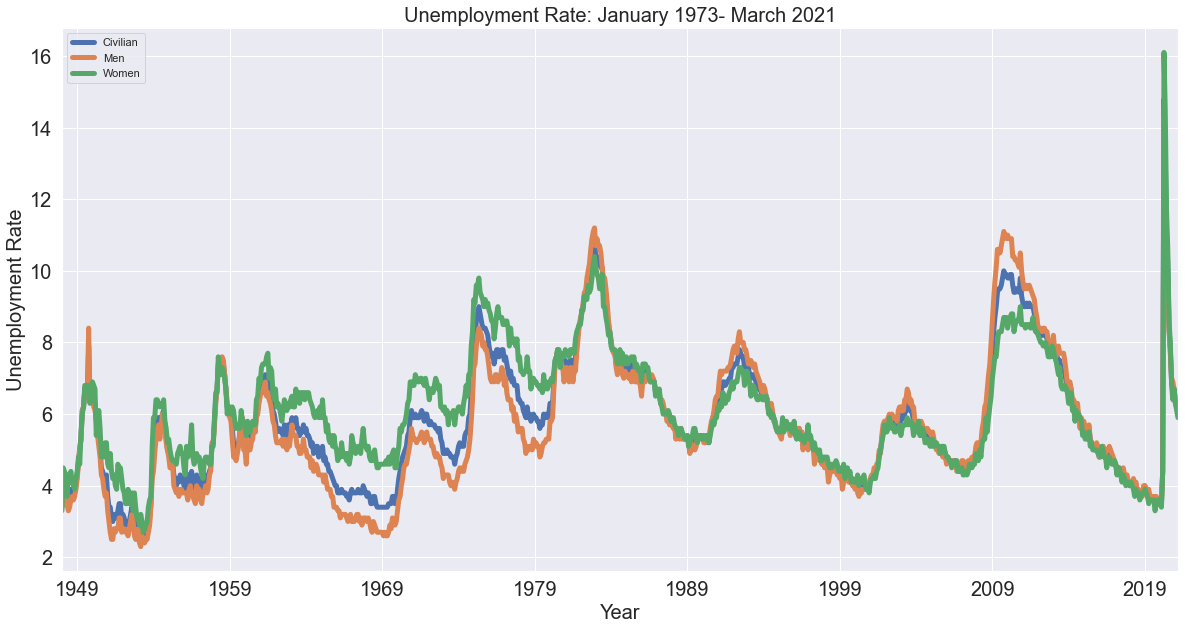

In [38]:
unemployment[['Civilian', 'Men','Women', ]].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title("Unemployment Rate: January 1973- March 2021",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Unemployment Rate', fontsize=20)
plt.show()

# Investigating unemployment rates: the COVID years

We are interested in looking at how the unemployment rates changed during the COVID pandemic. We want to plot a time series beginning at October 1, 2019, so that we have one fiscal year's data prior to the beginning of the pandemic as a reference. We begin by creating the COVID dataframe from the master unemployment dataframe csv file.

In [41]:
# Create COVID dataframe by reading .csv 
COVID_df = pd.read_csv('unemployment.csv')
COVID_df.head()

,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
0,1973-03-01,4.9,4.4,7.3,9.4,NaN,4.3,6.0,7.8,4.3,2.9,2.7,2.6,NaN,NaN,NaN,NaN,NaN,1973
1,1973-04-01,5.0,4.5,7.9,9.9,NaN,4.3,6.1,8.0,4.2,2.7,2.8,2.5,NaN,NaN,NaN,NaN,NaN,1973
2,1973-05-01,4.9,4.3,8.1,9.6,NaN,4.3,5.7,7.8,4.5,2.7,2.3,2.5,NaN,NaN,NaN,NaN,NaN,1973
3,1973-06-01,4.9,4.3,7.9,9.8,NaN,4.1,6.0,8.0,4.5,2.7,2.5,2.6,NaN,NaN,NaN,NaN,NaN,1973
4,1973-07-01,4.8,4.2,7.2,9.8,NaN,4.0,6.0,8.1,4.2,2.5,2.3,2.8,NaN,NaN,NaN,NaN,NaN,1973


In [42]:
# Now, we have to restrict the dataframe to the years of interest. We want to drop rows but we need to know
#the indices for the dates, so we will use a filter, commented out below.

start_date = "2018-09-01"
end_date= "2021-03-01"

mask = (COVID_df['Date'] > start_date) & (COVID_df['Date'] <= end_date)
COVID = COVID_df.loc[mask]

In [43]:
COVID.set_index('Date', inplace=True)
COVID

,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD,Year
Date,,,,,,,,,,,,,,,,,,
2018-10-01,3.8,3.3,4.4,6.4,3.1,3.8,3.7,7.0,3.7,3.0,2.8,2.9,6.0,4.1,2.0,1.9,1.0,2018
2018-11-01,3.8,3.4,4.6,6.2,2.7,3.7,3.8,6.9,3.8,3.0,2.7,2.9,5.7,3.6,2.2,2.0,0.9,2018
2018-12-01,3.9,3.4,4.5,6.8,3.1,4.0,3.8,7.4,4.0,2.8,2.9,3.0,5.9,3.8,2.2,2.1,1.3,2018
2019-01-01,4.0,3.5,4.8,6.9,3.2,4.0,3.9,7.5,3.9,2.9,2.9,3.2,5.8,3.6,2.4,2.2,1.3,2019
2019-02-01,3.8,3.2,4.3,7.0,3.2,3.8,3.8,7.1,4.0,2.6,2.8,2.7,5.4,3.6,2.2,1.8,1.4,2019
2019-03-01,3.8,3.3,4.5,6.5,3.0,3.9,3.7,7.1,3.9,2.8,2.8,2.6,5.8,3.6,2.0,1.8,1.1,2019
2019-04-01,3.7,3.2,4.1,6.6,2.1,3.9,3.5,6.6,3.9,2.7,2.6,2.6,5.3,3.5,2.1,1.5,0.9,2019
2019-05-01,3.7,3.3,4.1,6.1,2.3,3.7,3.6,6.9,3.5,2.7,2.6,2.8,5.2,3.6,2.2,1.7,1.0,2019
2019-06-01,3.6,3.3,4.3,6.0,2.3,3.6,3.6,5.9,3.5,2.8,2.8,3.0,5.3,4.0,2.1,2.4,1.2,2019


## COVID Unemployment Rate:Breakdown by Gender


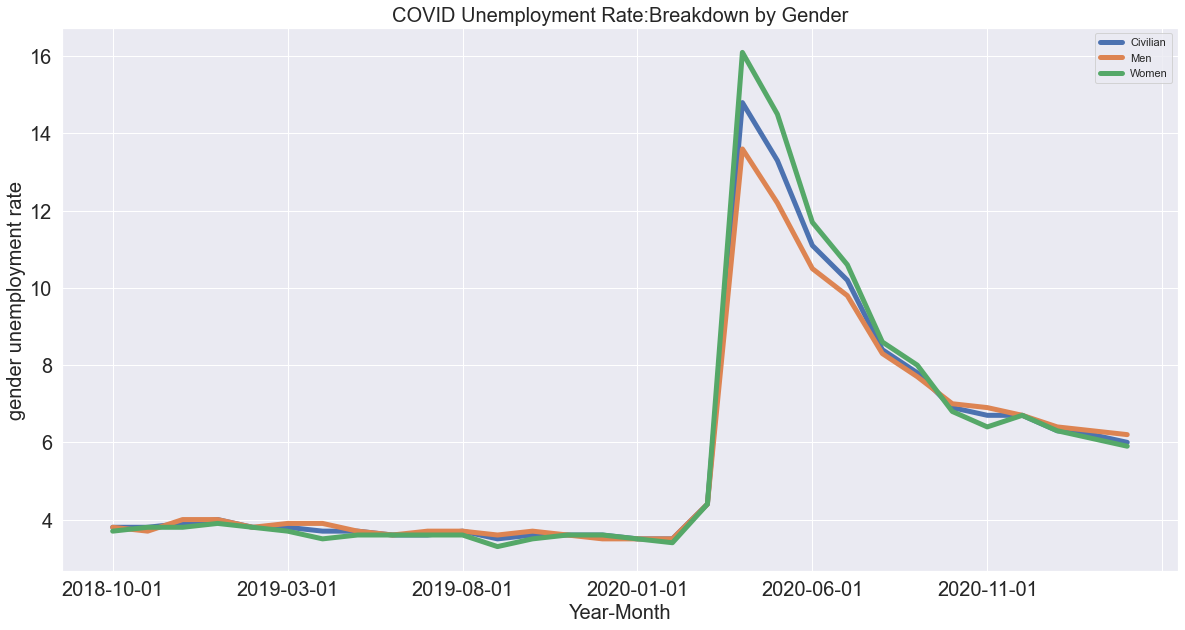

In [45]:
# Breaking down the unemployment rate by gender:
COVID[['Civilian','Men','Women']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title("COVID Unemployment Rate:Breakdown by Gender",fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel("gender unemployment rate",fontsize=20)
plt.show()

The first time series displays the overall, or "Civilian", unemployment rate in blue. We also show how this is decomposed into unemployment rates by gender. In green is the women's unemployment rate; the men's is in orange. This display clearly shows that for the peak of unemployment claims filed (April, 2020), unemployment was higher for women (16.1%) than for men (about 13.6%), a difference of 2.5%. The unemployment rates decreased at about the same rate; by September 2020, the gap between genders for unemployment all but disappeared. The current rate of unemployment seems to have leveled off to about 6%, with the men's rate (6.2) being slightly higher than the women's (5.9). This "new normal" is still 3% points {#CHECK NUMBERS} higher than it was before the pandemic began. 

## COVID Unemployment Rate:Breakdown by Race/Ethnic Group


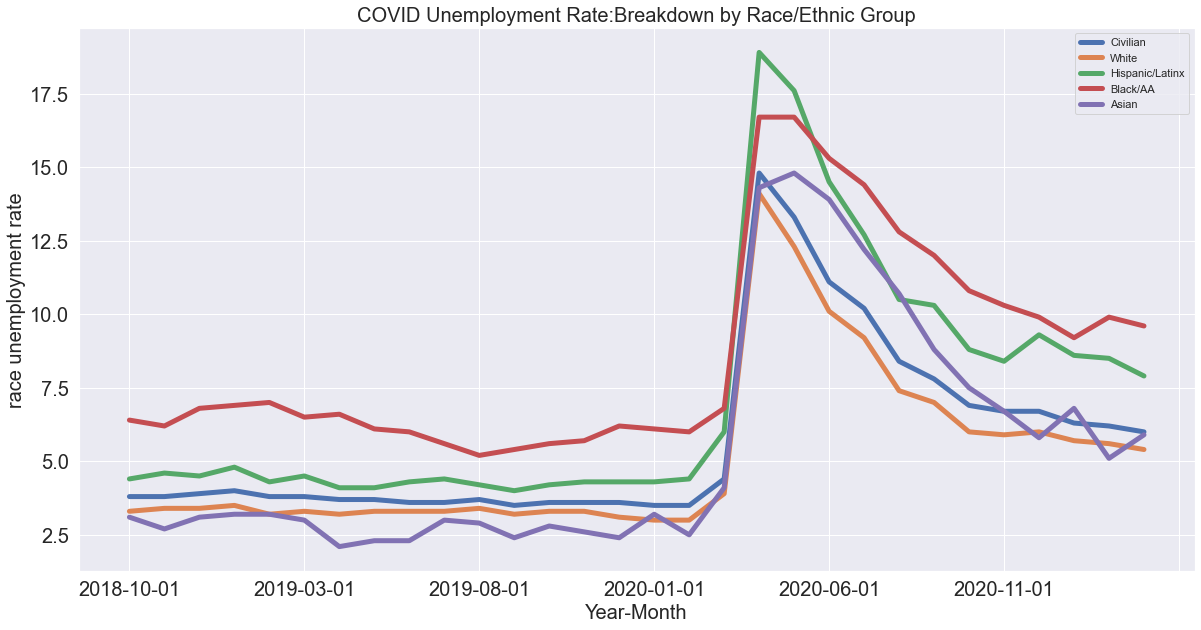

In [46]:
# Breaking down the unemployment rate by race:
COVID[['Civilian','White','Hispanic/Latinx','Black/AA','Asian']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title("COVID Unemployment Rate:Breakdown by Race/Ethnic Group",fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel("race unemployment rate",fontsize=20)
plt.show()


This next time series displays the unemployment rates disaggregated by race/ethnic groups. Again, the reference Civilian rate is in blue. At the peak of unemployment (14.8%), Hispanic/Latinx had the highest rate (18.9%), followed by Black/African American (16.7). Asians (14.3%) were almost tied with Whites (14.1%). Almost one year after the pandemic, unemployment rates have decreased for all groups, yet some have recovered more slowly than others. Asians and Whites recovered most quickly and have the lowest rate (5.9% and 5.4%, respectively); Blacks have had the slowest recovery and have the highest rate (9.6%) at this time. Note: in pre-pandemic times, Blacks had the highest unemployment rate (hovering around 6.5%) and lowest for Asians (around 2.5%). Overall, Hispanic/Latinx group had the most dramatic increase in unemployment rate (#NUMBER?).

## COVID Unemployment Rate:Breakdown by Age Group


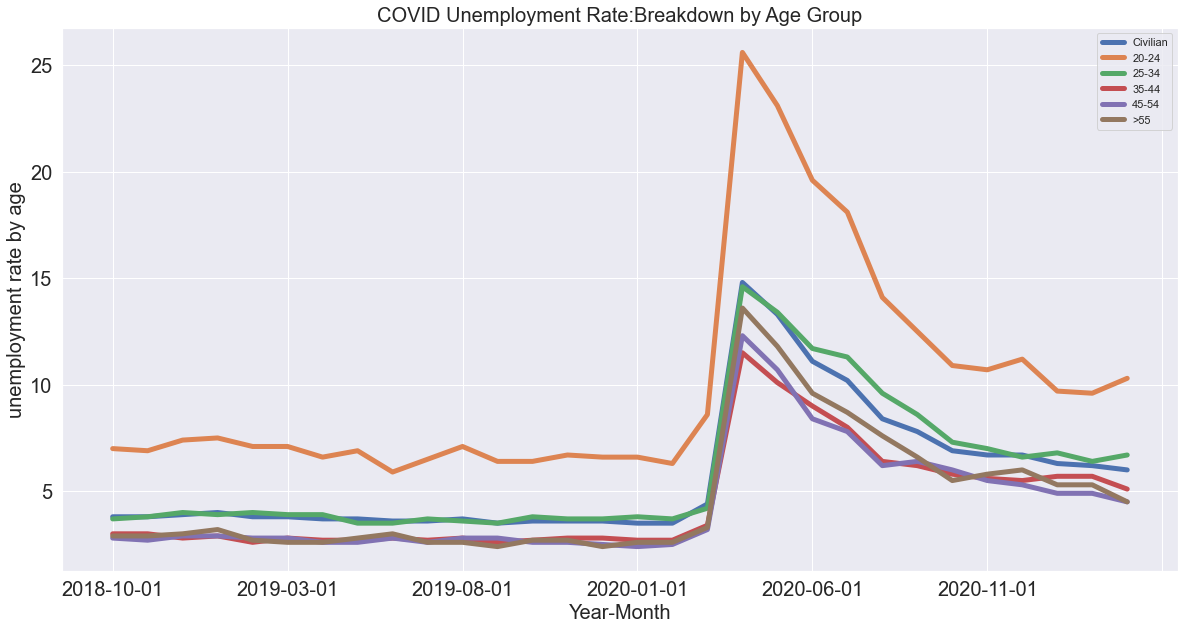

In [48]:
# Breaking down the unemployment rate by age:
COVID[['Civilian','20-24','25-34','35-44','45-54', '>55']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title("COVID Unemployment Rate:Breakdown by Age Group",fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel("unemployment rate by age", fontsize=20)
plt.show()
          

Here we see the time series for age groups. The youngest age group (20-24) had the highest rate of unemployment (25.6%); this result is consistent with the historical record. However, they did sustain the biggest change in unemployment rate (increase from January 2020 to April 2020 of 19 percentage points). (The other age groups all had an increase in unemployment by approximately 9 percentage points.) The next highest rate of unemployment was in the 25-34 category (14.6%). Older people (>55) was the next group to file the most unemployment claims; people 35 and over have had the best recovery. 

## COVID Unemployment Rate:Breakdown by Highest Level of Education


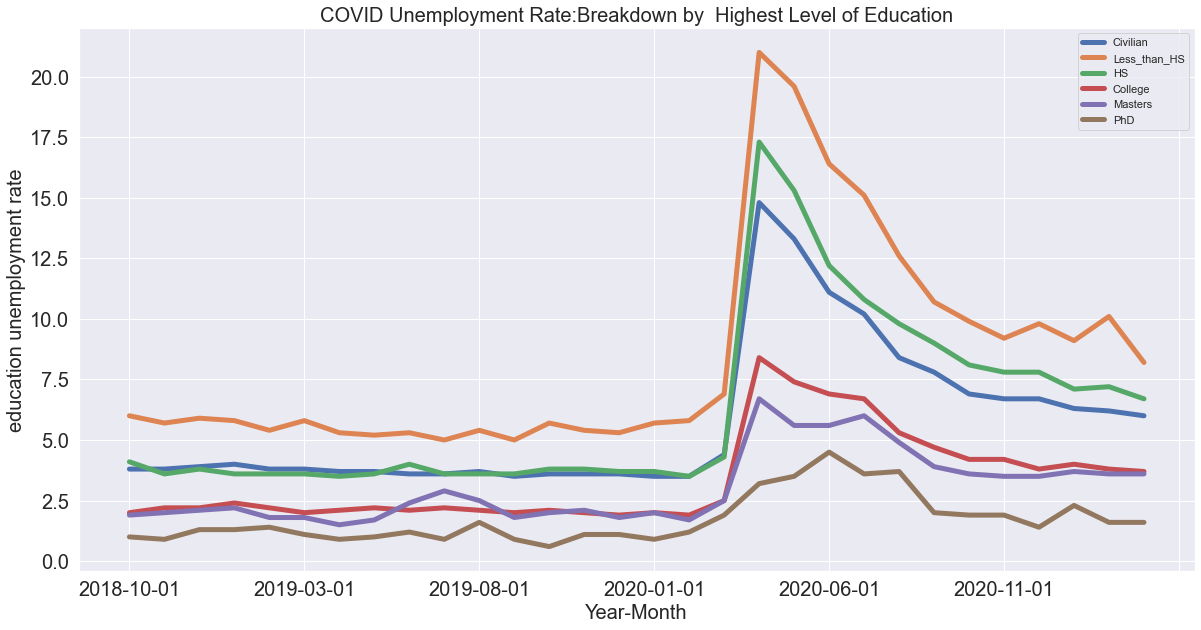

In [49]:
# Breaking down the unemployment rate by highest education level:
COVID[['Civilian','Less_than_HS','HS','College','Masters', 'PhD']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title("COVID Unemployment Rate:Breakdown by  Highest Level of Education",fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel("education unemployment rate",fontsize=20)
plt.show()

Finally, we look at the relationship between highest education level attained and unemployment rate. Note that the level of education is for all workers of age 25 and above. Those with the highest amount of education experienced the least job loss during the pandemic. For those with a PhD or equivalent level of education, their work lives were effectively unchanged. They may have had to work at home, but they were still employed. This particular group also did not experience the sharp peak in unemployment; maximum unemployment (4.5%) occurred in June, two months after the peak for all other groups. In contrast, the greatest unemployment rates were for those with a high school diploma (17.3%) or no diploma (21%). Having attained at least a bachelor's degree distinguishes two main groups. 

 ## Observable Trends

It was observed that unemployment rates were highest for:

- Women

- People of Color

- Hispanics/Latinx had highest amount of loss
      - Blacks have slowest recovery
      - Whites and Asians have lowest rates of unemployment, one year later
      - Young people, followed by people > 55

- People with a high school diploma (or less)

Unemployment rates were lowest for:

- Men
- Whites
- People between 34-55
- People with at least a bachelor’s degree
- Level of education attained segregates impact and recovery more than anything else